# Linear Regression Assignment

Complete implementation using sklearn and from-scratch methods.

## Generate Synthetic Data

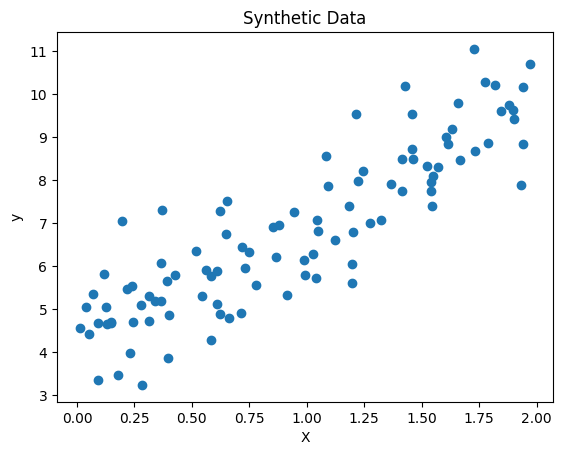

In [31]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Train-Test Split

In [32]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Linear, Ridge, and Lasso Regression

In [33]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd

lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)

results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "MSE": [
        mean_squared_error(y_test, pred_lr),
        mean_squared_error(y_test, pred_ridge),
        mean_squared_error(y_test, pred_lasso)
    ],
    "R2": [
        r2_score(y_test, pred_lr),
        r2_score(y_test, pred_ridge),
        r2_score(y_test, pred_lasso)
    ],
    "MAPE": [
        mean_absolute_percentage_error(y_test, pred_lr),
        mean_absolute_percentage_error(y_test, pred_ridge),
        mean_absolute_percentage_error(y_test, pred_lasso)
    ]
})

results


,Model,MSE,R2,MAPE
0,Linear,0.707061,0.831099,0.084757
1,Ridge,0.728412,0.825999,0.082412
2,Lasso,0.799232,0.809082,0.082640


## Custom Linear Regression (Gradient Descent)

In [34]:
class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m = 0
        self.b = 0
        n = len(X)
        self.losses = []

        for _ in range(self.epochs):
            y_pred = self.m * X + self.b
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            dm = (-2/n) * np.sum(X * (y - y_pred))
            db = (-2/n) * np.sum(y - y_pred)

            self.m -= self.lr * dm
            self.b -= self.lr * db

    def predict(self, X):
        return self.m * X + self.b


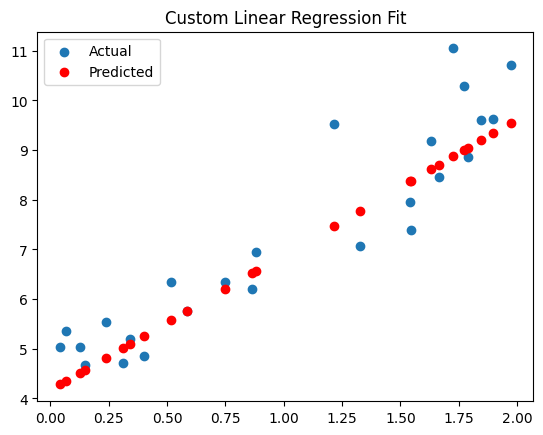

In [35]:
custom_lr = CustomLinearRegression(lr=0.1, epochs=1000)
custom_lr.fit(X_train, y_train)

y_pred_custom = custom_lr.predict(X_test)

plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred_custom, color="red", label="Predicted")
plt.legend()
plt.title("Custom Linear Regression Fit")
plt.show()


## Loss Curve

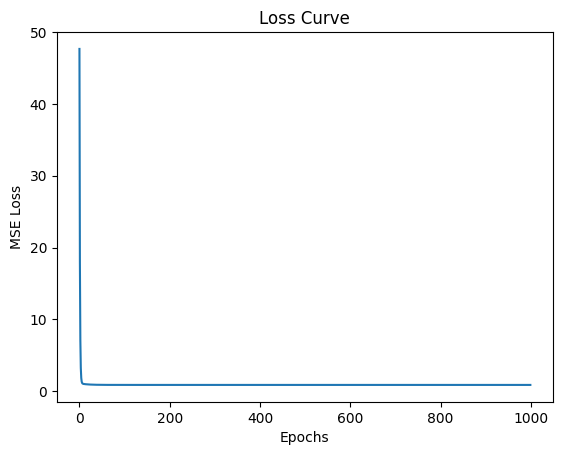

In [36]:
plt.plot(custom_lr.losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Curve")
plt.show()


Stochastic Gradient Descent

In [37]:
class SGDLinearRegression:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m = 0
        self.b = 0
        n = len(X)

        for _ in range(self.epochs):
            for i in range(n):
                y_pred = self.m * X[i] + self.b
                dm = -2 * X[i] * (y[i] - y_pred)
                db = -2 * (y[i] - y_pred)

                self.m -= self.lr * dm
                self.b -= self.lr * db

    def predict(self, X):
        return self.m * X + self.b


In [38]:
class SGDLinearRegression:
    def __init__(self, lr=0.01, epochs=20):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m = 0
        self.c = 0
        n = len(X)
        self.losses = []

        for _ in range(self.epochs):
            epoch_loss = 0

            for i in range(n):
                y_pred = self.m * X[i] + self.c
                error = y[i] - y_pred

                # Gradient update
                self.m += self.lr * error * X[i]
                self.c += self.lr * error

                epoch_loss += error**2

            # Mean loss per epoch
            self.losses.append(epoch_loss.mean())

    def predict(self, X):
        return self.m * X + self.c


In [39]:
sgd = SGDLinearRegression(lr=0.01, epochs=30)
sgd.fit(X_train, y_train)


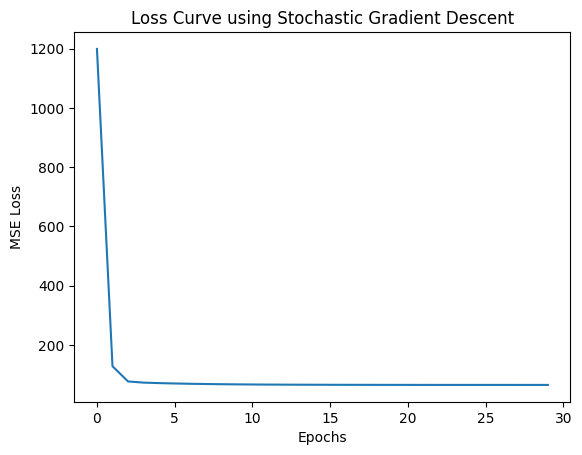

In [40]:
plt.plot(sgd.losses)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss Curve using Stochastic Gradient Descent")
plt.show()


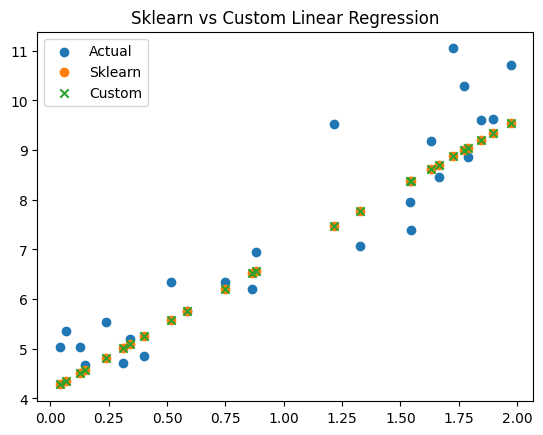

In [41]:
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, pred_lr, label="Sklearn")
plt.scatter(X_test, pred_custom, label="Custom", marker="x")
plt.legend()
plt.title("Sklearn vs Custom Linear Regression")
plt.show()
